# Exercise 4 Pump Control and Displacement Pump

## Task 1

The pump performance curve is given as below at the speed of 3000 RPM. The pump speed is controlled.

In [7]:
# First import all the packages
import os

import pandas as pd
from fluids import friction, core, fittings
from fluids.piping import nearest_pipe
from pyfluids import Fluid, FluidsList, Input
import numpy as np
from scipy.optimize import root_scalar
from scipy.interpolate import interp1d
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.options.plotting.backend = "plotly"

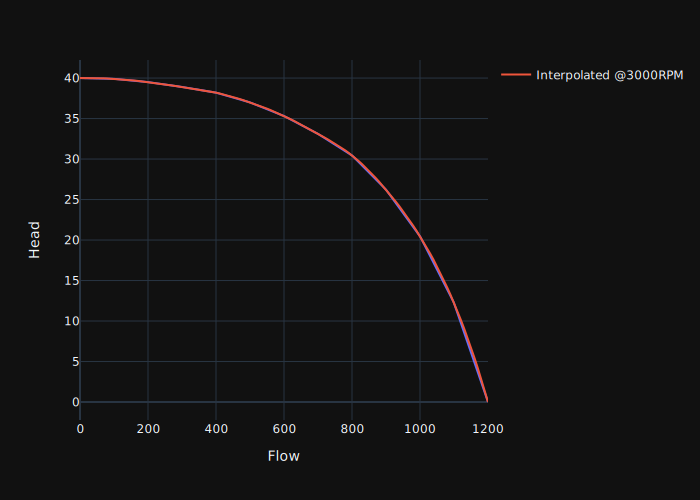

In [8]:
# Load pump curve
# In this example, we load the pump data from a file. The loaded data is
# stored in df which is DataFrame type. DataFrame is like your table in the excel.
# You can see the data by
# 'print(df)'
# and access flow data by `df.Flow` and head data by df.Head.

path = os.path.join("data", "Exercise_3_1_pump_perf_curve.csv")
df = pd.read_csv(path)
fig = df.plot(x="Flow", y="Head")

# Get interpolation curve
interp_func = interp1d(x=df.Flow, y=df.Head, kind="cubic")
vol_flow_m3_per_h_array = np.linspace(0, 1200, 121)

def get_pump_head_at3000rpm_m(vol_m3_per_h) -> float:
    """Returns pump head for the given vol flow at 3000 RPM"""
    return interp_func(vol_m3_per_h)
pump_head_array_3000rpm = get_pump_head_at3000rpm_m(vol_flow_m3_per_h_array)
fig.add_scatter(x=vol_flow_m3_per_h_array, y=pump_head_array_3000rpm, name="Interpolated @3000RPM")
fig.show(renderer="svg")

### 1.1 What will be the flow from the pump at n=3000 RPM when the pump is connected to a piping system with the following characteristics

$$
    \frac{\Delta p}{\rho g} = H = 3.0 + 2.0\cdot10^{-5}Q^2
$$

======================= Answer =======================

In [ ]:
# Lets plot the system head loss curve.
def get_head_loss_m(vol_flow_m3_per_h) -> float:
    # You code here. Implement a function that returns the head from given volume flow
    # It should be able to accept `vol_flow_m3_per_h` as a numpy array
    return head_loss_m


head_loss_m_array = get_head_loss_m(vol_flow_m3_per_h_array)

fig = make_subplots()
fig.add_scatter(x=vol_flow_m3_per_h_array, y=pump_head_array_3000rpm, name="pump")
fig.add_scatter(x=vol_flow_m3_per_h_array, y=head_loss_m_array, name="head loss")
fig.show(renderer="svg")

In [36]:
# Solve it numerically
def function_to_solve(vol_flow_m3_per_h) -> float:
    # Implement the function to solve the equation: f_pump_head(vol_flow) = f_head_loss(vol_flow)
    return error


sol = root_scalar(f=function_to_solve, x0=800, x1=900)
if sol.converged:
    vol_flow_with_piping_m3_per_h = sol.root
    print(f"Flow when the piping is connected: {vol_flow_with_piping_m3_per_h:.1f} m3/h")

Flow when the piping is connected: 975.7 m3/h


### 1.2 What will be the flow if we change the speed from 3000 RPM to 2000 RPM?

=============== Answer =================


In [37]:
# define the function to for the affinity law
def get_new_flow_affinity(
        vol_flow_m3_per_h: float, speed_rpm: float, new_speed_rpm: float
) -> float:
    """Returns new flow according to the affinity rule"""
    return # Your code here. Write the affinity to get the new flow for the new speed

def get_new_head_affinity(head_m: float, speed_rpm: float, new_speed_rpm: float) -> float:
    """Returns new head according to the affinity rule"""
    return # Your code here. Write the affinity to get the new head for the new speed

ref_speed_rpm = 3000

def get_pump_head_new_speed_m(vol_flow_m3_per_h: float, speed_rpm: float) -> float:
    # Your code here. Here you should implement the function that provides the new
    # pump curve for the new speed. Hint: Use the above affinity rule and the
    # original pump head function `get_pump_head_at3000rpm_m` to find the new curve
    # function

    return pump_head_m

In [ ]:
# Plot the pump curve for 2000 RPM
vol_flow_m3_per_h_array_2000rpm = np.linspace(
    0, vol_flow_m3_per_h_array.max() * 2000 / 3000
)
pump_head_array_2000rpm = get_pump_head_new_speed_m(
    vol_flow_m3_per_h=vol_flow_m3_per_h_array_2000rpm, speed_rpm=2000
)
fig = make_subplots()
fig.add_scatter(x=vol_flow_m3_per_h_array, y=pump_head_array_3000rpm, name="pump - 3000 RPM")
fig.add_scatter(x=vol_flow_m3_per_h_array_2000rpm, y=pump_head_array_2000rpm, name="pump - 2000 RPM")
fig.add_scatter(x=vol_flow_m3_per_h_array, y=head_loss_m_array, name="System head loss")
fig.show(renderer="svg")

In [39]:
# Solving it numerically
def function_to_solve(vol_flow_m3_per_h: float) -> float:
    # Your code here. Implement the equation to solve the equation for the operating point.
    return head_loss - pump_head
sol = root_scalar(f=function_to_solve, x0=600, x1=610)
if sol.converged:
    print(f"Flow will be reduced to: {sol.root:.1f} m3/h")

Flow will be reduced to: 624.5 m3/h


### 1.3 What should be the speed when the flow is reduced to 500m3/h?

============== Answer ================


In [ ]:
vol_flow_m3_per_h = 500

def function_to_solve(speed_rpm: float) -> float:
    # Your code here. You can use the system head loss function and the new
    # function for the pump head `get_pump_head_new_speed_m` to find the
    # equilibrium point.
    return head_loss_m - pump_head_m

sol = root_scalar(f=function_to_solve, x0=2000, x1=1900)
if sol.converged:
    pump_head = get_pump_head_new_speed_m(vol_flow_m3_per_h, speed_rpm=sol.root)
    print(f"The pump speed is {sol.root:.1f} RPM when the flow is {vol_flow_m3_per_h}m3/h")
    print(f"The pump head is {pump_head:.1f}m")

### 1.4 Flow control by throttling
We would like to reduce the flow to 500m3/h by throttling the valve while maintaining the pump at 3000 RPM. How can this be done? What will be the pump head in this case? Compare the power consumption for this case with the case where the pump speed was controlled. The efficiency of the pump is 0.6 for both cases. The density of the fluid is 1000kg/m3.

============ Answer =============



In [ ]:
vol_flow_m3_per_h = 500
head_loss_m = # Your code here to calculate the head loss or pump head for the given volume flow
print(f"The pump head when throttling is {head_loss_m:.1f}m")
efficiency = 0.6
density_kg_per_m3 = 1000
grav_acc_m_per_s2 = 9.81
power_kw_throttling = # Your code to calculate the power consumption for the pump when throttling
print(f"The power consumption when throttling is {power_kw_throttling:.1f} kW")
power_kw_speed = # Your code to calculate the power consumption for the pump when reducing the speed
print(f"The power consumption when reducing the speed is {power_kw_speed:.1f} kW")

## Task 2 Positive Displacement Pump

A pump has a displacement volume of 120 cm3. It delivers 0.0015 m3/s at 1440 RPM and 60 bar. The prime mover input torque is 130 Nm.

### 2.1 Efficiency of the pump

What is the overall efficiency of the pump and what is the theoretical torque required to operate the pump?


In [51]:
# Followings are given
vol_displacement_m3 = 120e-6
vol_flow_m3_per_s = 0.0015
speed_rpm = 1440
p_pump_pa = 60e5
torque_shaft_nm = 130

# Calculate the overall efficiency
overall_eff = # Your code here to calculate the overall efficiency
print(f"Overall efficiency: {overall_eff:.3f}")

# Calculate the volumetric efficiency
vol_eff = # Your code here to calculate the volumetric efficiency
print(f"Volumetric efficiency: {vol_eff:.3f}")

# Ideal torque to operate the pump
mech_eff = # Your code here to calculate the mechanical efficiency
torque_ideal_nm = # Your code here to calculate the ideal torque
print(f"Mechanical efficiency: {mech_eff:.3f}")
print(f"Ideal torque: {torque_ideal_nm:.1f}Nm")


Overall efficiency: 0.459
Volumetric efficiency: 0.521
Mechanical efficiency: 0.881
Ideal torque: 114.6Nm


### 2.2 Economic calculation

The pump is driven by an electric motor having an overall efficiency of 88%. The hydraulic system operates 12 h/d for 250 days per year. The cost of electricity is 1,00 kr / kWh.

Determine the yearly cost of electricity to operate the hydraulic system and the amount of the yearly cost of the electricity due to the energy loss in the motor and the pump.

In [ ]:
# Followings are given
operation_hours_per_day = 12
operation_days = 250
elec_motor_eff = 0.88
price_electricity_kr_per_kwh = 1

# Amount of energy used by the pump per year
cost_elec_total_kr = # Your code to calculate total electric cost
cost_loss_elec_motor = # Your code to calculate electric cost due to loss in the electric motor
cost_loss_pump = # Your code to calculate electric cost due to loss in the pump

print("Cost [kr]")
print(f"\tTotal: {cost_elec_total_kr:.1f}")
print(f"\tElectric motor loss: {cost_loss_elec_motor:.1f}")
print(f"\tPump loss: {cost_loss_pump:.1f}")